Dataset already exists. Skipping download.
GPU Available: []
Found 24246 images belonging to 3 classes.
Found 6060 images belonging to 3 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,099 (109.76 KB)

 Trainable params: 28,099 (109.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5041 - loss: 1.0731 - val_accuracy: 0.6516 - val_loss: 1.0075
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.6506 - loss: 0.9980 - val_accuracy: 0.6375 - val_loss: 0.9193
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.6676 - loss: 0.9009 - val_accuracy: 0.6609 - val_loss: 0.8609


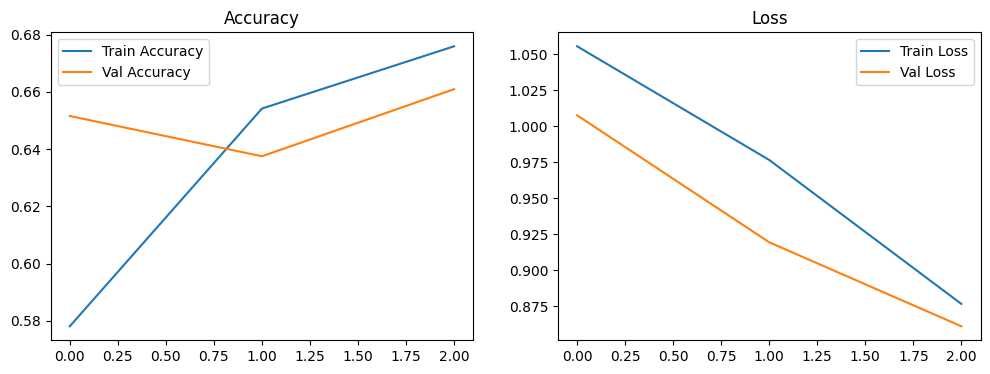

95/95 ━━━━━━━━━━━━━━━━━━━━ 81s 851ms/step


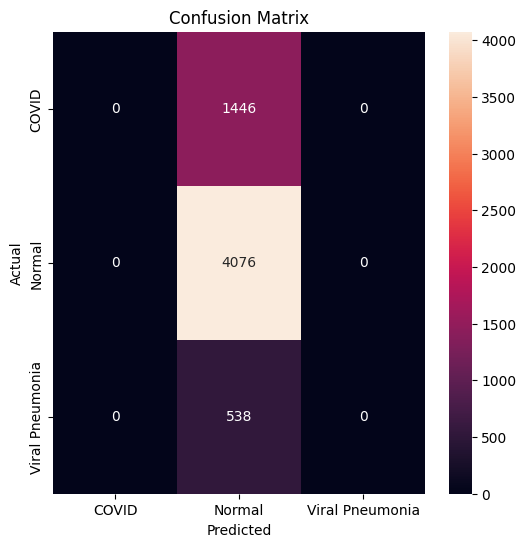

                 precision    recall  f1-score   support

          COVID       0.00      0.00      0.00      1446
         Normal       0.67      1.00      0.80      4076
Viral Pneumonia       0.00      0.00      0.00       538

       accuracy                           0.67      6060
      macro avg       0.22      0.33      0.27      6060
   weighted avg       0.45      0.67      0.54      6060



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# ==========================================
# 🚀 COVID-19 X-Ray Detection - RD
# ==========================================

# ==============================
# INSTALL DEPENDENCIES
# ==============================
!pip install -q kaggle seaborn

# ==============================
# SET KAGGLE CREDENTIALS
# ==============================
import os

os.environ['KAGGLE_USERNAME'] = 'RDProject'
os.environ['KAGGLE_KEY'] = 'KGAT_5451feab60a55abc8d39c767916a3646'

# ==============================
# DOWNLOAD DATASET ONLY IF NOT PRESENT
# ==============================
dataset_path = "/content/COVID-19_Radiography_Dataset"

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    !kaggle datasets download -d tawsifurrahman/covid19-radiography-database
    !unzip -oq covid19-radiography-database.zip
else:
    print("Dataset already exists. Skipping download.")

# ==============================
# IMPORT LIBRARIES
# ==============================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

print("GPU Available:", tf.config.list_physical_devices('GPU'))

# ==============================
# DATA GENERATORS (3 CLASSES ONLY)
# ==============================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    classes=['COVID','Normal','Viral Pneumonia']
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    classes=['COVID','Normal','Viral Pneumonia']
)

# ==============================
# BUILD OPTIMIZED CNN MODEL
# ==============================
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
    ])
    return model

model = build_model()
model.summary()

# ==============================
# COMPILE MODEL
# ==============================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ==============================
# TRAIN MODEL (FAST DEMO)
# ==============================
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,              # reduce epochs
    steps_per_epoch=30,    # only 30 batches per epoch
    validation_steps=10,
    callbacks=[early_stop]
)

# ==============================
# PLOT ACCURACY & LOSS
# ==============================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

# ==============================
# CONFUSION MATRIX + REPORT (FIXED)
# ==============================
val_generator.reset()
pred = model.predict(val_generator)

y_pred = np.argmax(pred, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(
    y_true,
    y_pred,
    target_names=val_generator.class_indices.keys(),
    zero_division=0
))

# ==============================
# SAVE MODEL
# ==============================
model.save("covid_xray_model.h5")

from google.colab import files
files.download("covid_xray_model.h5")